In [1]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

import konlpy
okt = konlpy.tag.Okt()

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['figure.figsize'] = 10,10
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [2]:
news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

## 언론사 확인

In [3]:
press = bkp.press_counter(news_df)

<AxesSubplot: xlabel='기사', ylabel='언론사'>

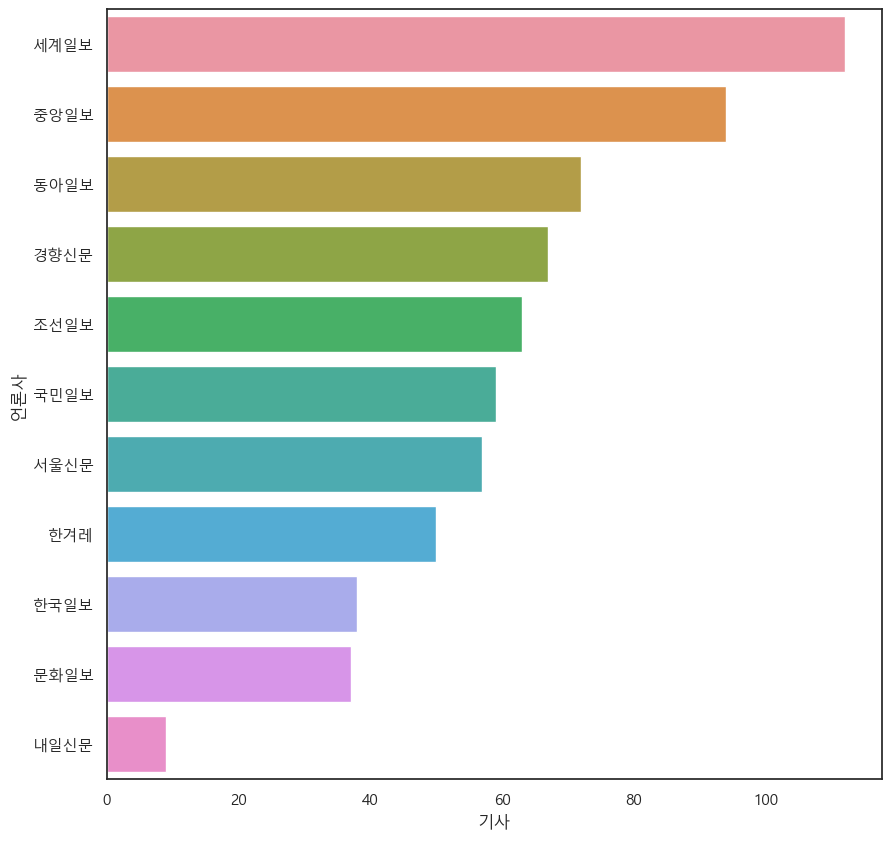

In [4]:
sns.barplot(data = press, x = "기사", y = "언론사")

## 키워드 빈도

In [5]:
lis = bkp.keywords_list(news_df["키워드"])

In [6]:
key = bkp.keyword_parser(lis)

In [7]:
key = bkp.duplication_remover(key)

In [8]:
key_words = bkp.word_counter(key)
key_words = bkp.counter_to_DataFrame(key_words)

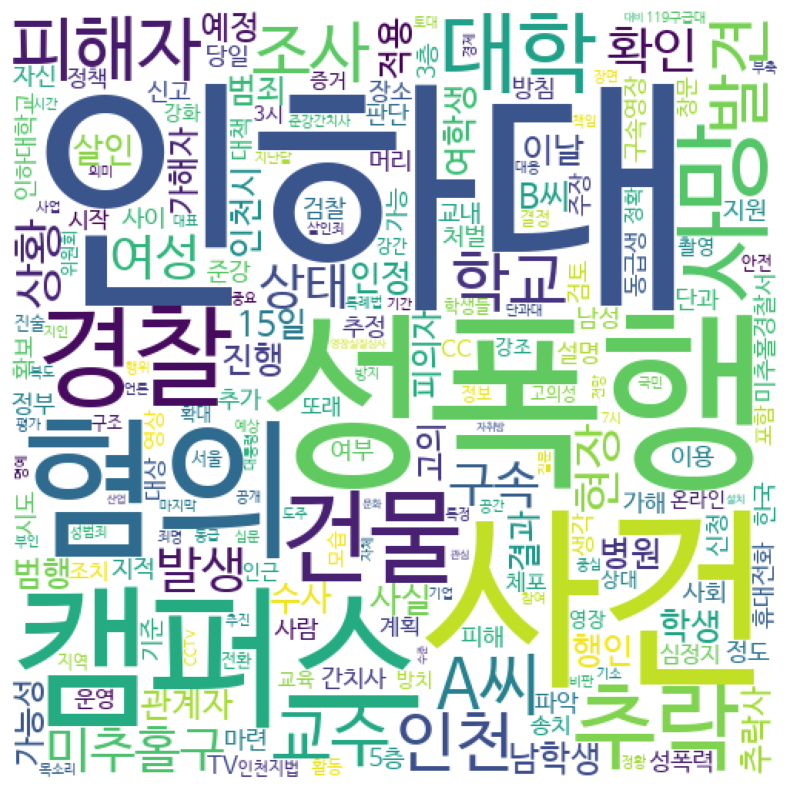

In [9]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(key_words.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 언론사 별 단어 빈도 분석

In [10]:
news_df['언론사'].unique()

array(['조선일보', '국민일보', '중앙일보', '한겨레', '서울신문', '내일신문', '경향신문', '문화일보',
       '동아일보', '세계일보', '한국일보'], dtype=object)

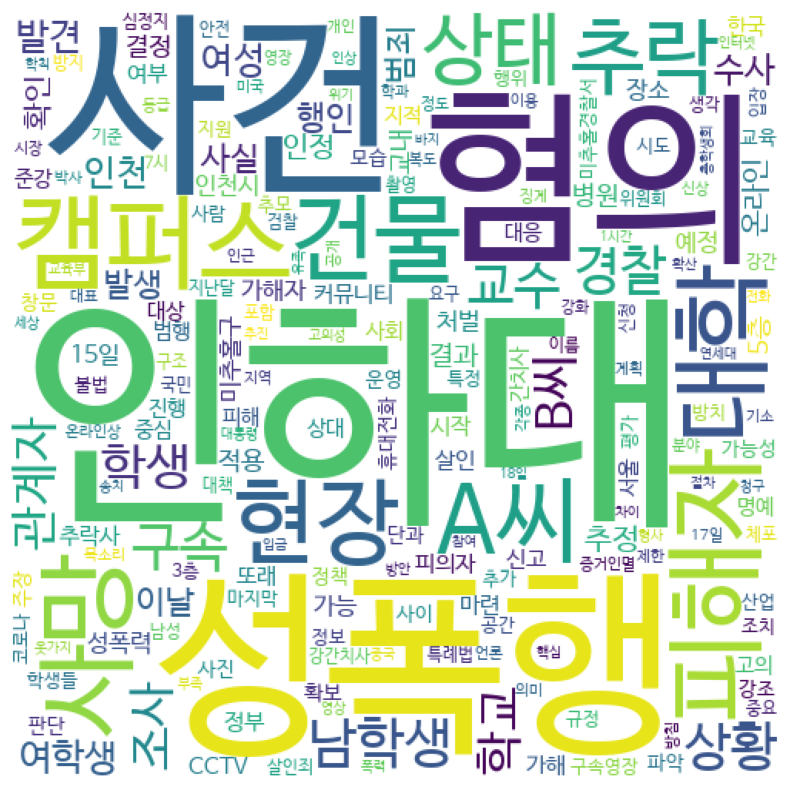

In [11]:
bkp.press_keywords_wordcloud(news_df, '조선일보')

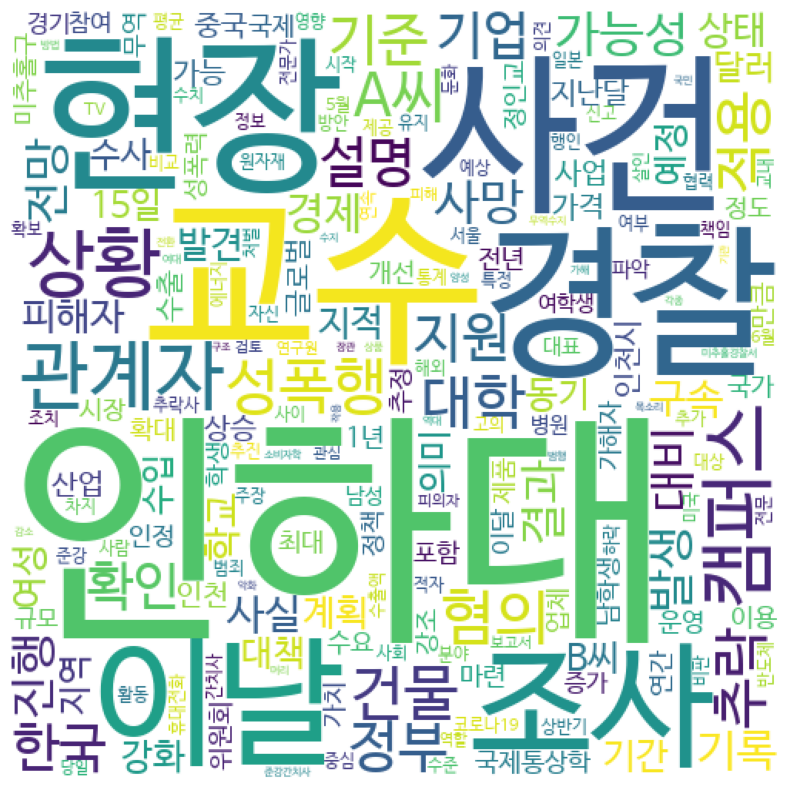

In [12]:
bkp.press_keywords_wordcloud(news_df, '중앙일보')

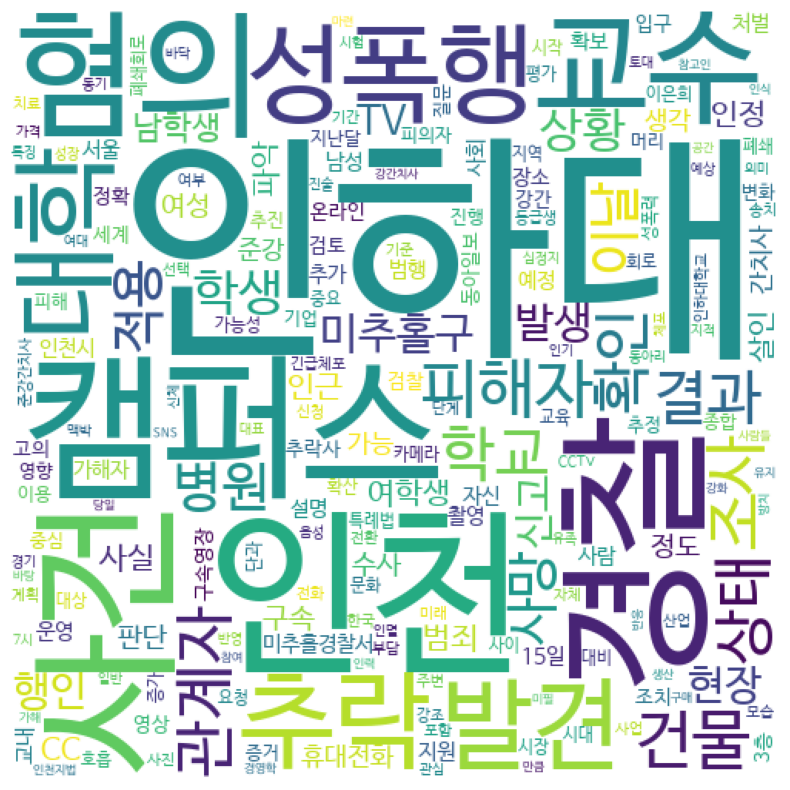

In [13]:
bkp.press_keywords_wordcloud(news_df, '동아일보')

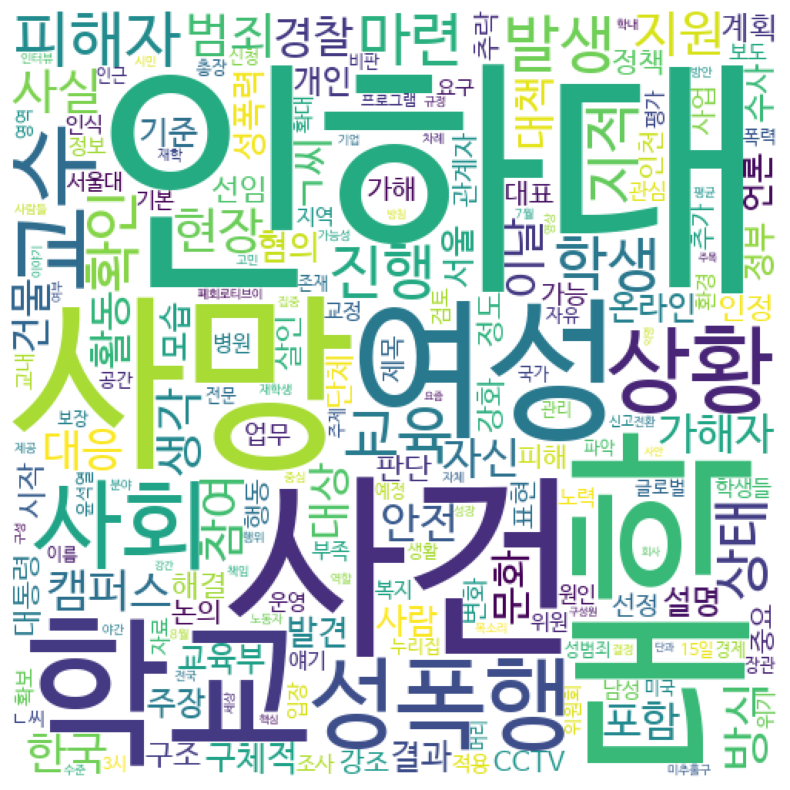

In [18]:
bkp.press_keywords_wordcloud(news_df, '한겨레')

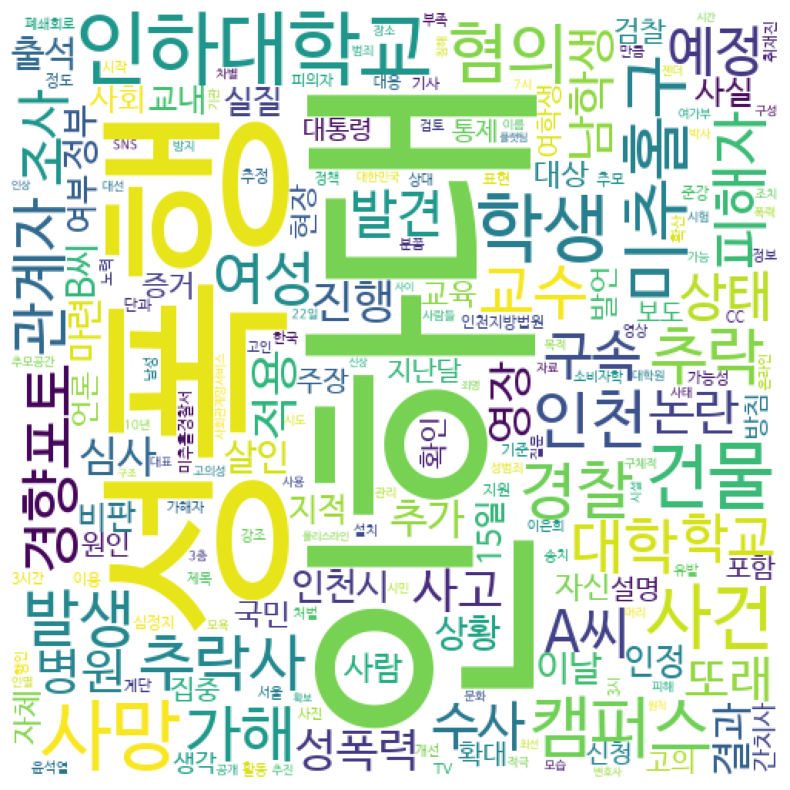

In [19]:
bkp.press_keywords_wordcloud(news_df, '경향신문')

## 제목 단어 빈도 분석

In [20]:
title = bkp.keywords_list(news_df['제목'])

In [21]:
words = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    words.append(word)

In [22]:
news_titles = bkp.word_counter(words)
news_titles = bkp.counter_to_DataFrame(news_titles)

In [23]:
news_titles= news_titles[news_titles["단어"].str.len() >=2].reset_index(drop = True)

In [24]:
news_titles = news_titles.head(20)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

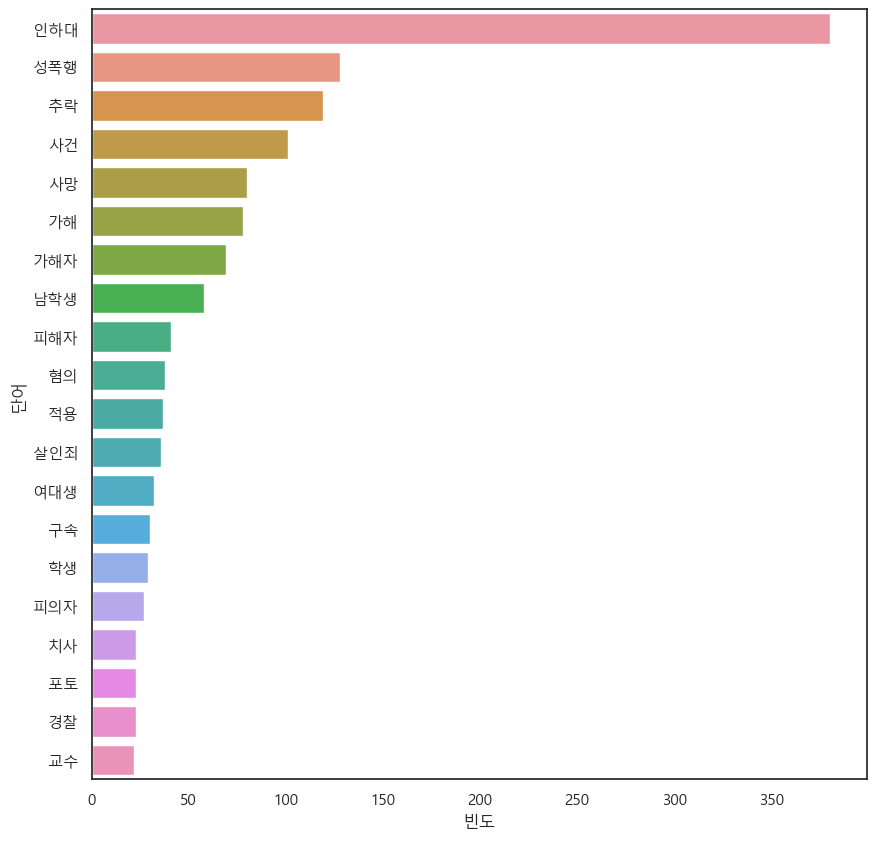

In [25]:
sns.barplot(data = news_titles, x = '빈도', y = '단어')

## 키워드 분석 with Bigram

In [29]:
from nltk import bigrams

In [42]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '성폭행':
            wor.append(t[1])
        elif t[1] == '성폭행':
            wor.append(t[0])

In [45]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [49]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

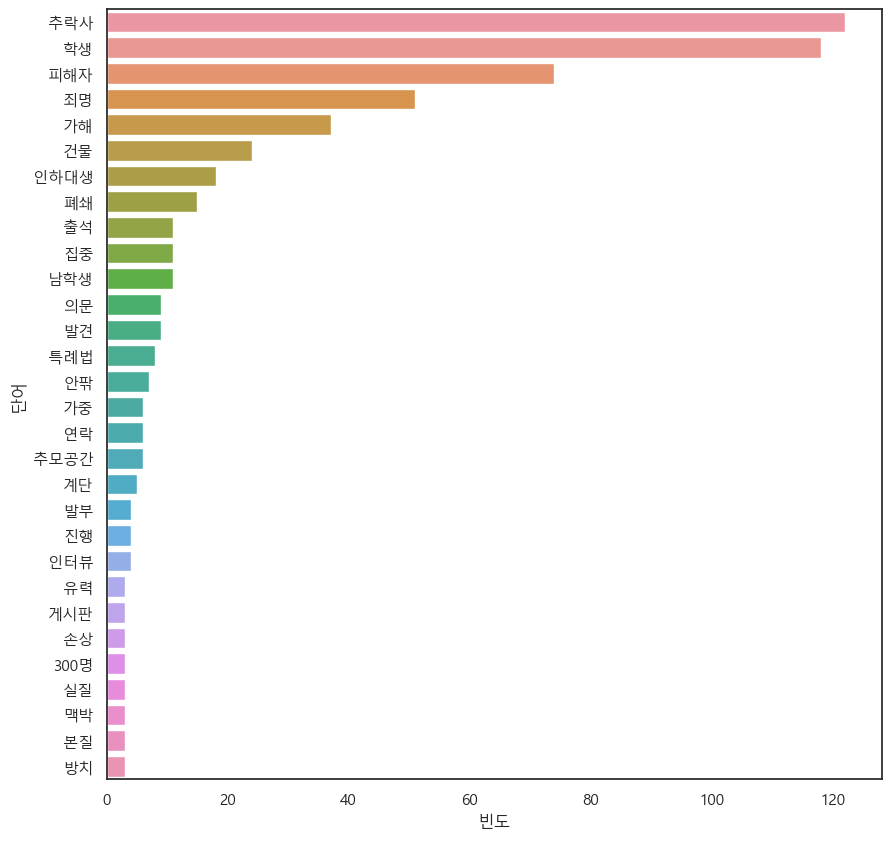

In [50]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

In [51]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '여대생':
            wor.append(t[1])
        elif t[1] == '여대생':
            wor.append(t[0])

In [52]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [53]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

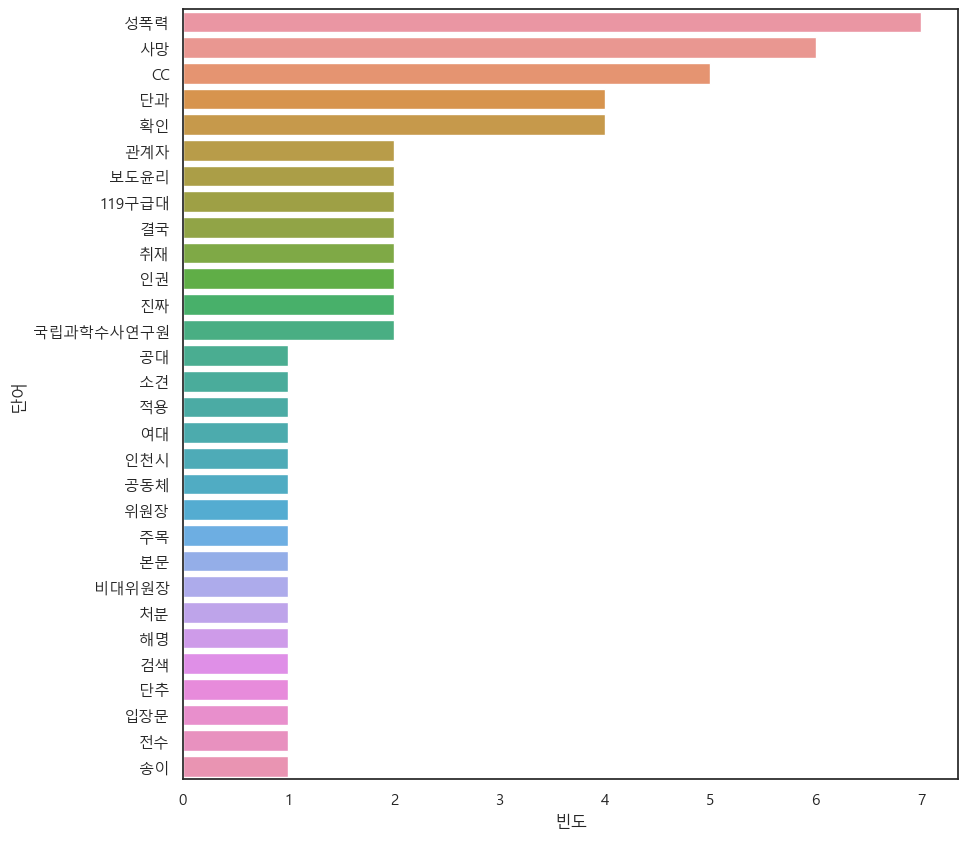

In [54]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

## 제목 분석 with Bigram

In [58]:
title = bkp.keywords_list(news_df['제목'])

In [59]:
bot = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    bot.append(word)

In [60]:
wors = []

for sentence in bot:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '인하대':
            wors.append(t[1])
        elif t[1] == '인하대':
            wors.append(t[0])

In [64]:
counter = {}

for word in wors:
    if not word in counter:
        counter[word] = 1
    if word in counter:
        counter[word] +=1
        
title_df = bkp.counter_to_DataFrame(counter)
title_df = title_df[title_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

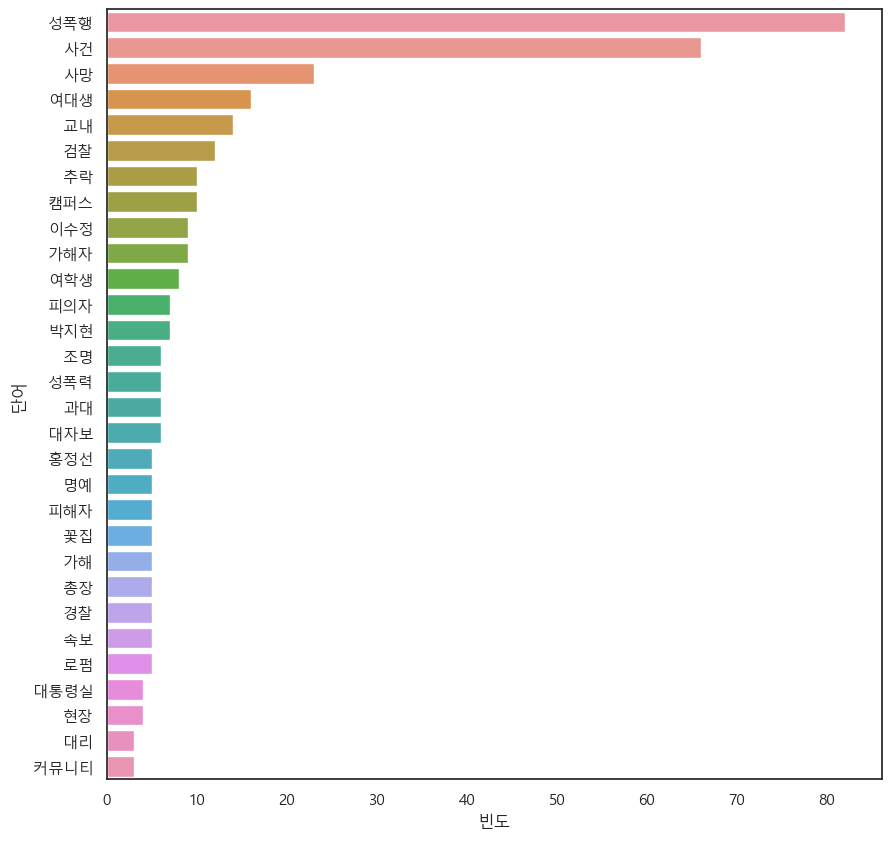

In [65]:
sns.barplot(data = title_df, x = '빈도', y = '단어')

## 특정 단어 사용 고빈도 언론사 추출

In [66]:
news_df[news_df['제목'].str.contains('여대생')].groupby('언론사').size()

언론사
경향신문    1
동아일보    5
문화일보    1
서울신문    6
세계일보    8
조선일보    3
중앙일보    8
dtype: int64

In [68]:
news_df[news_df['본문'].str.contains('여대생')].groupby('언론사').size()

언론사
경향신문     2
국민일보     2
동아일보     8
문화일보     5
서울신문     6
세계일보    16
조선일보     5
중앙일보     5
한겨레      2
dtype: int64

In [69]:
news_df[news_df['제목'].str.contains('강간')].groupby('언론사').size()

언론사
경향신문    2
국민일보    5
동아일보    3
문화일보    1
서울신문    5
세계일보    1
조선일보    6
중앙일보    3
한겨레     1
dtype: int64

## t-SNE

In [71]:
text = news_df['키워드']

In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).todense()

In [77]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(vec)

tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


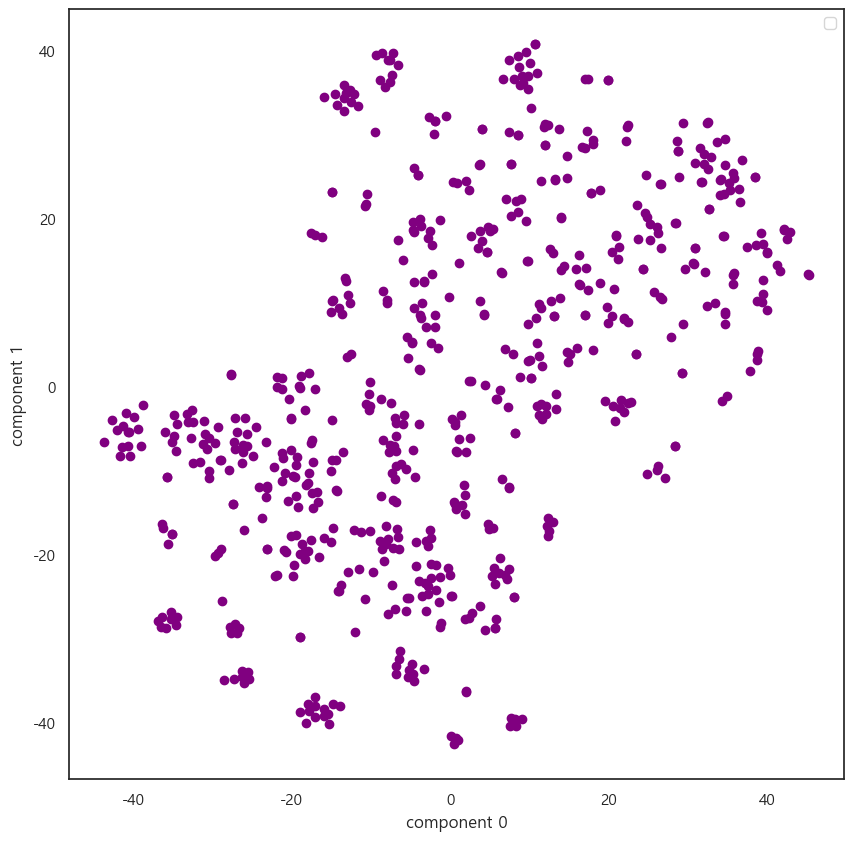

In [78]:
plt.scatter(tsne_df['component 0'], tsne_df['component 1'], color = 'purple')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

문서 간 밀접 여부 파악이 어려움

Clustering의 정확도가 낮을 것으로 예상

# Topic Modeling

In [80]:
news_words = bkp.keyword_parser(news_df['키워드'])

In [83]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [84]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

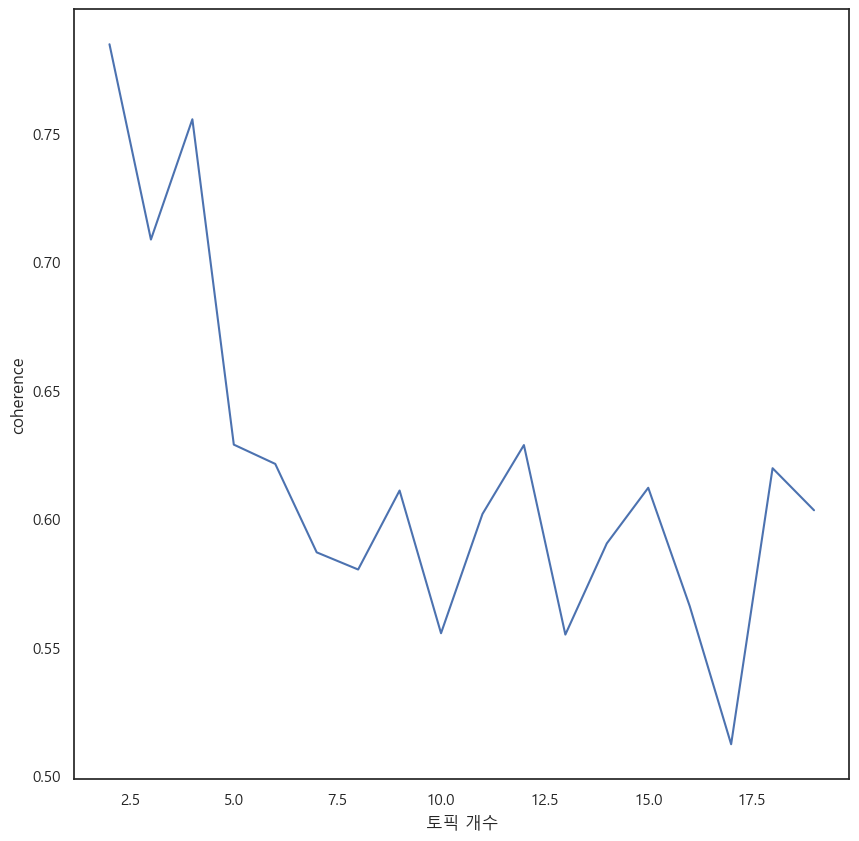

In [85]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

최적 Topic이 1개로 나옴

즉 거의 모든 문서의 내용이 상당히 일치함을 의미

다만, 주제 분석을 위해 두 번째로 가장 높은 3개를 토픽 개수로 설정하여 LDA 진행

In [86]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=20, iterations=100, random_state=100)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.010*"사건" + 0.007*"피해자" + 0.007*"여성" + 0.007*"인하대" + 0.006*"성폭력"')
(1, '0.006*"교수" + 0.005*"정부" + 0.005*"인하대" + 0.005*"중국" + 0.004*"수출"')
(2, '0.026*"A씨" + 0.024*"인하대" + 0.023*"경찰" + 0.020*"혐의" + 0.019*"B씨"')


In [87]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [88]:
pyLDAvis.save_html(vis, 'inha_LDA.html') #LDAvis save

In [89]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [90]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [91]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

,뉴스 번호,주요 토픽,주요 토픽 비중,토픽 별 비중
0,0,1,0.9945,"[(1, 0.99450916)]"
1,1,1,0.9956,"[(1, 0.9955837)]"
2,2,0,0.8433,"[(0, 0.8433483), (1, 0.15550976)]"
3,3,1,0.9974,"[(1, 0.9973682)]"
4,4,0,0.9961,"[(0, 0.99609613)]"
5,5,0,0.9257,"[(0, 0.9256698), (1, 0.07336069)]"
6,6,1,0.9965,"[(1, 0.9965316)]"
7,7,0,0.9943,"[(0, 0.9943093)]"
8,8,1,0.9949,"[(1, 0.99492234)]"
9,9,1,0.9954,"[(1, 0.9954295)]"


In [93]:
news_topic_df = pd.concat([news_df[['제목', '언론사']],topictable['주요 토픽']], axis = 1)

In [110]:
news_topic_df[news_topic_df['주요 토픽'] == 0].tail(30) #젠더 이슈 관련 기사 + 광고형 기사가 다소 섞임

,제목,언론사,주요 토픽
458,"침묵 깬 최강욱, 북송논란 직격 “철지난 북한 이슈 장사”",세계일보,0
459,인하대 피해자 ‘행실’이 왜 나오냐 2차 가해 분노한 여성들,한겨레,0
460,여름 휴가 포기 VS 미국 유럽 여행,세계일보,0
465,‘캠퍼스 성범죄’ 비상 걸린 대학가 ‘인하대 사망’으로 불안감 커져,동아일보,0
466,대학 캠퍼스에 CCTV 늘리고 야간 출입제한 순찰 강화키로,조선일보,0
468,‘어민 북송’ 전면 참전한 대통령실 앞장서 수사 ‘가이드라인 제시’ 논란,경향신문,0
469,"‘위법성’ 앞세운 대통령실, 북송 사건 수사 지침 논란",경향신문,0
471,"인하대가 홈페이지에 띄운 입장문 “가해 남학생, 징계절차 진행 중”",조선일보,0
474,‘인하대 성폭행 사망사건’ 이후 대학들 학내 성범죄 예방 고심,동아일보,0
475,"북송 영상 공개된 날 최강욱, SNS에 “철지난 北이슈 장사”",중앙일보,0


In [101]:
news_topic_df[news_topic_df['주요 토픽'] == 1].tail(20) #인하대 사건과 관련 없는 기사

,제목,언론사,주요 토픽
370,“떡볶이 하나 시키려니 2만원 넘어” ‘NO 배달음식’ 선언하는 자취생들,문화일보,1
372,"[포토타임] 여야 18개 상임위원장 선출 법사위 김도읍, 행안위 이채익, 과방위 정청래",중앙일보,1
382,"'슈퍼 감세' 후폭풍 209조 국정과제 조정이냐, 긴축 포기냐",한국일보,1
384,[분양 포커스] 개발호재 많은 경기 지역노른자위 물량 쏟아진다,중앙일보,1
395,"""성공하셨네"" 말에 취해 포르쉐 샀다 30대 카푸어 최후 [밀실]",중앙일보,1
436,"정부, 금산분리 규제 손댄다 은행도 부동산 배달 진출 가능",한겨레,1
441,"盧 ""못해먹겠다"" 후회한 그 장면 고용장관, 파업장 날아갔다 [현장에서]",중앙일보,1
446,<포럼>‘칩4’ 참여 당위와 對中 협력 지렛대,문화일보,1
464,"“목소리 빼앗고 삶의 질 떨어뜨리는 후두암, 확실한 예방법은 금연”",동아일보,1
478,7월 19일 알림,한겨레,1


In [112]:
news_topic_df[news_topic_df['주요 토픽'] == 2].tail(30) #인하대 사건 관련 기사

,제목,언론사,주요 토픽
623,인하대서 숨진 채 발견된 여대생 같은 학교 1학년 남성 긴급체포,세계일보,2
624,인하대 여학생 사망 사건 동급생 ‘강간치사 혐의’ 긴급체포,문화일보,2
625,‘인하대 여대생 사망’ 동급생 강간치사 혐의 긴급체포,서울신문,2
626,"인하대 여대생 사망, 男동급생 ‘강간치사’ 혐의 긴급체포(종합2보)",서울신문,2
627,"[속보] 경찰, 인하대 사망 여대생과 함께 있던 남학생 긴급체포",세계일보,2
628,인하대 여대생 교내 사망 같은 학교 1학년생 피의자 조사,세계일보,2
629,숨진 인하대 여대생 함께 술마신 동급생 강간치사 혐의 체포,중앙일보,2
630,인하대 여대생 타살 정황 같은 학교 1학년 남학생 피의자 조사(종합),서울신문,2
631,인하대 여대생 타살 정황 용의자는 ‘같은 학교 1학년 남학생’,세계일보,2
633,인하대 여학생 사망 사건 같은 학교 1학년생 피의자 조사,문화일보,2
